# Importing Packages and Data

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def grab_by_element(df,target_column,elem):
    """
    Arguments:  df, target_column, elem
    Returns the dataframe compose of those rows in the original dataframe "df" that have "elem" as an element of their entry
    for column "target_column"
    """
    return df.loc[df[target_column].apply(lambda x: elem in x)]

In [3]:
sns.set_style("darkgrid")
sns.set_palette('plasma')

In [4]:
df = pd.read_csv('data/final_df.csv')
df = df.drop(columns='Unnamed: 0')
df.shape

(9887, 64)

In [5]:
# At the moment, I do not have the year in which undrafted players played their first game.
# For this reason, I will be doing initial EDA with players who were drafted, until I scrape
# that information for those 1700 players.

df = df.loc[df.drafted == 1]
df.shape

(8187, 64)

# Move Over to Cleaning Upon Undrafted First Years

In [6]:
# Creating a variable to track each player's current season, which will be used for creating a
# variable showing their number of seasons left.
df['season'] = df.current_year - df.draft_year

# Creating the target variable of seasons left. Will move this over to the Cleaning notebook
# upon retrieval of the undrafteds' first years.

def compute_seasons_left():
    """This is a function that computes 
    
    """
    # Creating a 'seasons left' column with a placeholder value of -1.
    df['seasons_left'] = -1
    
    for player in df.Player.unique():
        # Creating a subsetted dataframe for each player
        temp_df = df[df.Player == player]
        # Gets the amount of seasons each player has played
        max_value = temp_df.season.max()
        # Appends the number of seasons left from the temp_df into main df
        for row in temp_df.index:
            df.loc[row, 'seasons_left'] = max_value - df.loc[row, 'season']

In [7]:
compute_seasons_left()

In [8]:
# Pairing down dataframe to only include players that are no longer in the NBA.
current_players = list(df[df.current_year == 2019].Player)

# EDA!

In [9]:
df.head(2)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF_playoffs,PTS_playoffs,current_year_playoffs,playoffs,player_height,player_weight,draft_year,drafted,season,seasons_left
0,Rik Smits,C,30.0,IND,52.0,52.0,29.2,6.8,14.1,0.486,...,NaN,NaN,NaN,0,88.0,265.045145,1988.0,1,9.0,3.0
1,Tony Smith,PG,28.0,CHH,69.0,39.0,18.7,2.0,4.9,0.409,...,0.5,0.5,1997.0,1,76.0,205.034924,1990.0,1,7.0,4.0


In [10]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,PF_playoffs,PTS_playoffs,current_year_playoffs,playoffs,player_height,player_weight,draft_year,drafted,season,seasons_left
count,8187.000000,8187.000000,8187.000000,8187.000000,8187.000000,8187.000000,8167.000000,8187.000000,8187.000000,7030.000000,...,3701.000000,3701.00000,3701.000000,8187.000000,8187.000000,8187.000000,8187.000000,8187.0,8187.000000,8187.000000
mean,26.860755,55.630756,29.084646,21.777660,3.324478,7.406156,0.440160,0.569097,1.626957,0.278064,...,2.099649,8.80027,2008.162659,0.452058,79.245242,223.468012,2001.652254,1.0,6.381092,4.164041
std,4.497458,23.791090,29.920769,10.048138,2.239281,4.764989,0.085418,0.677676,1.790752,0.158785,...,1.175591,7.33087,6.719115,0.497727,3.545317,27.645931,7.979029,0.0,4.274067,3.725178
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1997.000000,0.000000,63.000000,133.022658,1963.000000,1.0,0.000000,0.000000
25%,23.000000,39.000000,1.000000,13.400000,1.500000,3.600000,0.403000,0.000000,0.100000,0.205250,...,1.200000,2.80000,2002.000000,0.000000,77.000000,205.034924,1996.000000,1.0,3.000000,1.000000
50%,26.000000,63.000000,16.000000,21.600000,2.900000,6.400000,0.440000,0.300000,1.000000,0.324000,...,2.100000,7.00000,2008.000000,0.000000,80.000000,225.038331,2002.000000,1.0,6.000000,3.000000
75%,30.000000,76.000000,58.000000,30.300000,4.700000,10.400000,0.480000,1.000000,2.800000,0.371750,...,3.000000,13.20000,2014.000000,1.000000,82.000000,245.041738,2008.000000,1.0,9.000000,6.000000
max,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.100000,13.200000,1.000000,...,6.000000,37.40000,2019.000000,1.000000,90.000000,343.058433,2018.000000,1.0,49.000000,20.000000


In [12]:
# Needed for EDA
# Converting current_year to a string so the grab_by_element function will play nice.
df.current_year = df.current_year.astype(str)

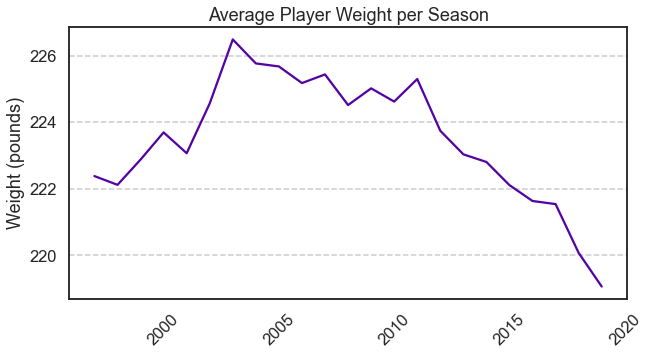

In [13]:
data_for_chart={}
for year in range(1997, 2020):
    data_for_chart[year]=grab_by_element(df,'current_year',str(year)).player_weight.mean()
  
global_context='talk'
fs=1.0

sns.set(global_context,font_scale=fs)
sns.set_style('white')
sns.set_palette('plasma')
plt.figure(figsize=(10,5))

ax=sns.lineplot(x=list(data_for_chart.keys()),y=list(data_for_chart.values()),color=sns.color_palette('plasma')[0])


ax.set(ylabel='Weight (pounds)')
ax.set(xlabel='');
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.axes.grid(axis='y',linestyle='--')
ylabels=[f'{int(s)}' for s in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.xticks(rotation=45)

plt.title(f'Average Player Weight per Season')
plt.show()

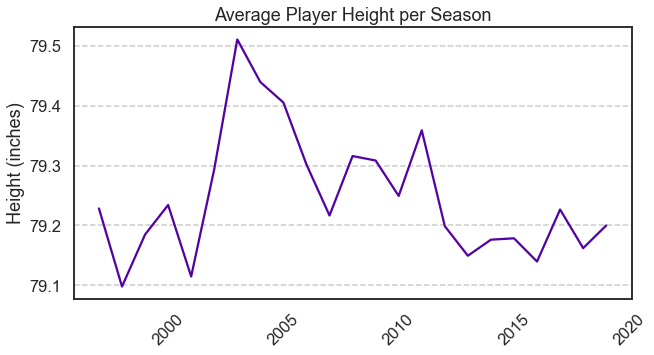

In [14]:
data_for_chart={}
for year in range(1997, 2020):
    data_for_chart[year]=grab_by_element(df,'current_year',str(year)).player_height.mean()
  
global_context='talk'
fs=1.0

sns.set(global_context,font_scale=fs)
sns.set_style('white')
sns.set_palette('plasma')
plt.figure(figsize=(10,5))

ax=sns.lineplot(x=list(data_for_chart.keys()),y=list(data_for_chart.values()),color=sns.color_palette('plasma')[0])


ax.set(ylabel='Height (inches)')
ax.set(xlabel='');
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.axes.grid(axis='y',linestyle='--')
ylabels=[f'{float(s)}' for s in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.xticks(rotation=45)

plt.title(f'Average Player Height per Season')
plt.show()

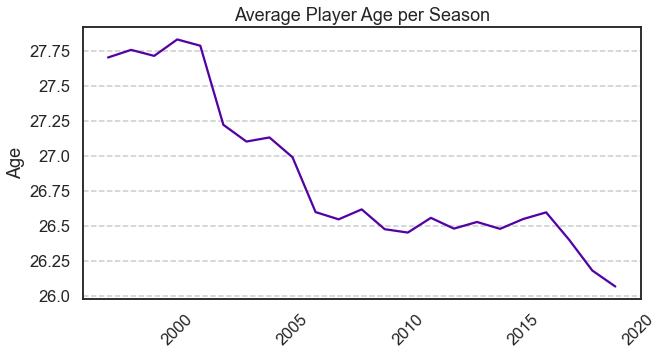

In [15]:
data_for_chart={}
for year in range(1997, 2020):
    data_for_chart[year]=grab_by_element(df,'current_year',str(year)).Age.mean()
  
global_context='talk'
fs=1.0

sns.set(global_context,font_scale=fs)
sns.set_style('white')
sns.set_palette('plasma')
plt.figure(figsize=(10,5))

ax=sns.lineplot(x=list(data_for_chart.keys()),y=list(data_for_chart.values()),color=sns.color_palette('plasma')[0])


ax.set(ylabel='Age')
ax.set(xlabel='');
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.axes.grid(axis='y',linestyle='--')
ylabels=[f'{float(s)}' for s in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.xticks(rotation=45)

plt.title(f'Average Player Age per Season')
plt.show()

In [16]:
global_context='talk'
fs=1.0
plt.figure(figsize=(4,8))
sns.set(global_context,font_scale=fs)
ax=sns.violinplot(y=grab_by_element(df,'player_height','Animation').loc[(df.current_year==1999.0)]\
                  .player_height,color=sns.color_palette('plasma')[2],saturation=.5
           )
ax.set(ylabel='Height');
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.axes.grid(axis='x',linestyle='--')
ylabels=[f'{int(s)}%' for s in ax.get_yticks()]
ax.set_yticklabels(ylabels)

plt.xticks(rotation=0)

plt.title('Spread of Player Height for the 1998-1999 Season')
plt.show()

TypeError: argument of type 'float' is not iterable

<Figure size 288x576 with 0 Axes>

In [ ]:
df.head()

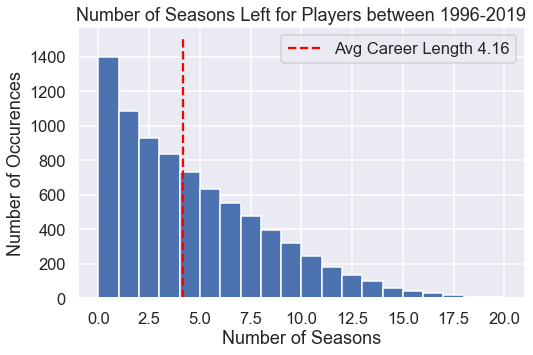

In [36]:
plt.figure(figsize=(8,5))

plt.hist(df.seasons_left, bins = 20)
plt.vlines(x=df.seasons_left.mean(), ymin=0, ymax=1500,
          linestyles='dashed', color='red', 
          label=f'Avg Career Length {round(df.seasons_left.mean(), 2)}')

plt.title('Number of Seasons Left for Players between 1996-2019')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Occurences')
plt.legend()
plt.show()

# The distribution of seasons left seems to fall in line with what one would expect. The
# average NBA career lasts 4.5 seasons, and the average of our data falls at 4.16. Many players
# have shorter careers, and there are a much fewer players whose career lengths will reach 
# double digit years.


In [33]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'current_year',
       'Pos_playoffs', 'Age_playoffs', 'Tm_playoffs', 'G_playoffs',
       'GS_playoffs', 'MP_playoffs', 'FG_playoffs', 'FGA_playoffs',
       'FG%_playoffs', '3P_playoffs', '3PA_playoffs', '3P%_playoffs',
       '2P_playoffs', '2PA_playoffs', '2P%_playoffs', 'eFG%_playoffs',
       'FT_playoffs', 'FTA_playoffs', 'FT%_playoffs', 'ORB_playoffs',
       'DRB_playoffs', 'TRB_playoffs', 'AST_playoffs', 'STL_playoffs',
       'BLK_playoffs', 'TOV_playoffs', 'PF_playoffs', 'PTS_playoffs',
       'current_year_playoffs', 'playoffs', 'player_height', 'player_weight',
       'draft_year', 'drafted', 'season', 'seasons_left'],
      dtype='object')

In [37]:
df.drafted.value_counts()

1    8187
Name: drafted, dtype: int64